In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
import re
import seaborn as sns

In [2]:
# Descarga del DataFrame en archivo CSV. 

data_shark = pd.read_csv('/Users/JGR/IRON_HACK/Sharks/attacks.csv', encoding='UTF-8',encoding_errors='ignore')

# Enseña la cabeza del DataFrame
data_shark.head(2) 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,NaN,"No injury, knocke off board",N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0


In [3]:
data_shark.info() # Vemos toda la informacion de la Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6095 non-null   object 
 1   Date                    6094 non-null   object 
 2   Year                    6092 non-null   float64
 3   Type                    6090 non-null   object 
 4   Country                 6048 non-null   object 
 5   Area                    5682 non-null   object 
 6   Location                5583 non-null   object 
 7   Activity                5559 non-null   object 
 8   Name                    5888 non-null   object 
 9   Sex                     5517 non-null   object 
 10  Age                     3374 non-null   object 
 11  Injury                  6066 non-null   object 
 12  Fatal (Y/N)             6064 non-null   object 
 13  Time                    2848 non-null   object 
 14  Species                 3100 non-null 

In [4]:
# Vemos todos los valores nulos que tiene la DF.
df = pd.DataFrame(data_shark)
null_counts = df.isna().sum() 
nulls = null_counts[null_counts > 0] 

In [5]:
nulls

Case Number               19519
Date                      19520
Year                      19522
Type                      19524
Country                   19566
Area                      19932
Location                  20031
Activity                  20055
Name                      19726
Sex                       20097
Age                       22240
Injury                    19548
Fatal (Y/N)               19550
Time                      22766
Species                   22514
Investigator or Source    19537
pdf                       19520
href formula              19521
href                      19521
Case Number.1             19520
Case Number.2             19520
original order            19520
dtype: int64

In [6]:
data_shark.shape

(25614, 22)

In [7]:
df = data_shark.drop_duplicates() # Quitamos los duplicados y la guardamos en otra variable

In [8]:
df.shape

(6097, 22)

In [9]:
df = df.fillna('0') # Rellenamos todos los valores nulos restantes con el valor "0"
df.tail(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0
25613,xx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [11]:
df = df.rename(columns={'Sex ': 'Sex', 'Species ': 'Specie'})

In [12]:
df.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0


In [13]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Specie', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [14]:
df = df.rename(columns={'Case Number.1': 'Attack Date'})

In [15]:
df['Case Number.2'] = 0 # Limpieza de datos que me son irrelevantes

In [16]:
df['Name'] = 0 # Por la ley de proteccion de datos. 

In [17]:
df['original order'] = 0  # Limpieza de datos que me son irrelevantes

In [18]:
df['href formula'] = 0  # Limpieza de datos que me son irrelevantes

In [19]:
df['href'] = 0  # Limpieza de datos que me son irrelevantes

In [20]:
df = df.drop('pdf', axis=1) # Borramos la columna que no nos hace falta. Dejando las 22 restantes 

In [21]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,href formula,href,Attack Date,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,2017.06.11,0,0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,2017.06.10.b,0,0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,2017.06.10.a,0,0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,2017.06.07.R,0,0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,0,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",0,0,2017.06.04,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,0,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0,0,ND.0002,0,0
6093,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,0,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0,0,ND.0001,0,0
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0


In [22]:
df = df.rename(columns={"Case Number.2": "Year"})   # Renombramos la columna a Year

In [23]:
df["Attack Date"] = df["Attack Date"].str.slice(stop=10) # Nos quedamos con los 10 primeros valores de la col. 

In [24]:
# Sustituimos los valosres que empiezan por "ND" y los dejamos como Unknown
df.loc[df["Attack Date"].str.startswith("ND"), "Attack Date"] = 0 


In [25]:
df = df.rename(columns={"original order": "Month"}) # Cambiamos el nombre de la columna a Month

In [26]:
# trasladamos los 4 primeros digitos de la columna Attack Date a Year ya que es el año
df["Year"] = df["Attack Date"].str.slice(stop=4)

# Copiar los siguientes 2 dígitos de Attack Date a Month
df["Month"] = df["Attack Date"].str.slice(start=5, stop=7)

In [27]:
df['Year'] = df['Year'].fillna(0) # Rellenamos todos los valores nan a 0 de esta columan espcificamente

In [28]:
df['Month'] = df['Month'].fillna(0)# Rellenamos todos los valores nan a 0 de esta columan espcificamente

In [29]:
df['Year Season'] = df['Month'] # creamos una nueva columna para hacer por estaciones del año

In [30]:
df.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,2017.06.11,2017,06,06
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,2017.06.10,2017,06,06


In [31]:
# Creamos una funcion para poder analizar el numero de casos por temporada.
def get_season(month):
    if month in ['12', '01', '02']:
        return 'Winter'
    elif month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    elif month in ['09', '10', '11']:
        return 'Autumn'

# Aplicar la función al DataFrame y crear una nueva columna llamada 'estacion'
df['Year Season'] = df['Year Season'].apply(get_season)

In [32]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,2017.06.11,2017,06,Summer
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,2017.06.10,2017,06,Summer
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,2017.06.10,2017,06,Summer
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,2017.06.07,2017,06,Summer
4,2017.06.04,2017-06-04,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,0,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",0,0,2017.06.04,2017,06,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,ND.0002,1883-1889,0,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,0,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0,0,0,0,0,None
6093,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,0,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0,0,0,0,0,None
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,None
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,,None


In [33]:
# Vemos el numero de casos que hay por estacion 
seasons = df['Year Season'].value_counts()
seasons

Summer    1703
Autumn    1344
Winter    1312
Spring    1213
Name: Year Season, dtype: int64

<AxesSubplot:ylabel='Year Season'>

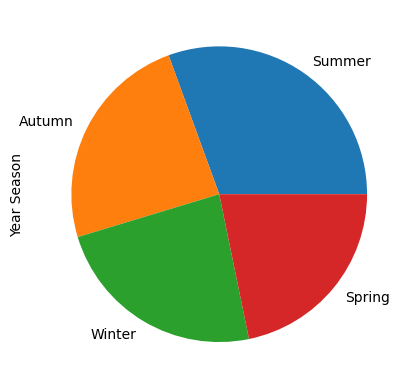

In [34]:
seasons.plot.pie()

In [35]:
# Porcentaje por Pais
Country_counts = df['Country'].value_counts()
Country_percentages = Country_counts / len(df) * 100
Percentages = Country_percentages.head(5)

In [36]:
Percentages

USA                 35.427259
AUSTRALIA           21.371166
SOUTH AFRICA         9.365262
PAPUA NEW GUINEA     2.181401
NEW ZEALAND          2.066590
Name: Country, dtype: float64

<AxesSubplot:ylabel='Country'>

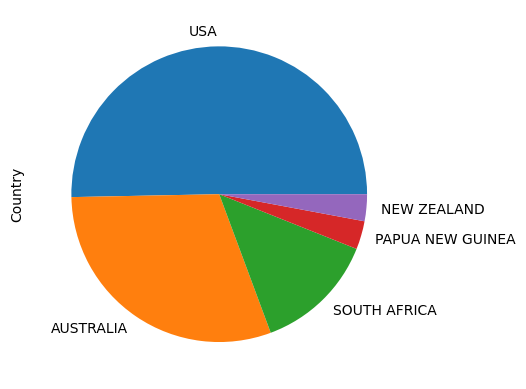

In [37]:
Percentages.plot.pie()

In [38]:
# Porcentaje por Sexo
Sex_counts = df['Sex'].value_counts()
Sex_percentages = Sex_counts / len(df) * 100
S_percentage = Sex_percentages.head(2)

In [39]:
S_percentage

M    80.465803
F     9.939314
Name: Sex, dtype: float64

<AxesSubplot:ylabel='Sex'>

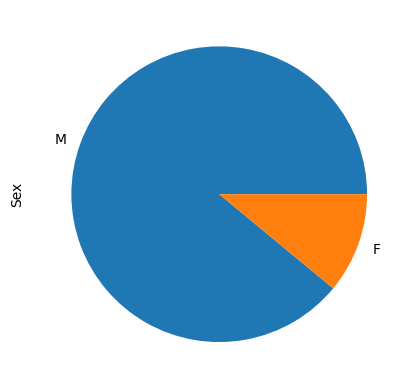

In [40]:
S_percentage.plot.pie()

In [41]:
injuries = df['Injury'].value_counts()
injurie = injuries.head(10)

In [42]:
injurie

FATAL                      746
Survived                    97
Foot bitten                 83
No injury                   79
Leg bitten                  71
Left foot bitten            49
No details                  43
Right foot bitten           39
0                           31
No injury, board bitten     30
Name: Injury, dtype: int64

<AxesSubplot:ylabel='Injury'>

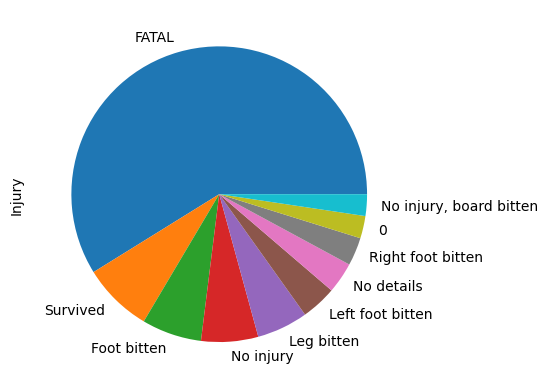

In [43]:
injurie.plot.pie()

In [44]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,2017.06.11,2017,06,Summer
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,2017.06.10,2017,06,Summer
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,2017.06.10,2017,06,Summer
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,2017.06.07,2017,06,Summer
4,2017.06.04,2017-06-04,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,0,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",0,0,2017.06.04,2017,06,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,ND.0002,1883-1889,0,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,0,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0,0,0,0,0,None
6093,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,0,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0,0,0,0,0,None
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,None
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,,None


In [45]:
df['Year'] = df['Year'].fillna(0) # Relle

In [46]:
df['Month'] = df['Month'].fillna(0)

In [47]:
df.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,2017.06.11,2017,06,Summer
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,2017.06.10,2017,06,Summer


In [48]:
# porcentaje de la causa de los ataques segun la actividad
activity = df['Activity'].value_counts()
activity_percentage = activity.head(10) / len(df) *100
activity_percentage

Surfing         15.269805
Swimming        13.646055
0                8.824012
Fishing          6.806626
Spearfishing     5.330490
Bathing          2.525832
Wading           2.394620
Diving           2.050189
Standing         1.590946
Snorkeling       1.361325
Name: Activity, dtype: float64

<AxesSubplot:ylabel='Activity'>

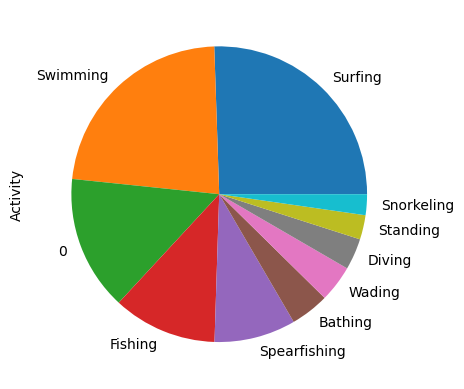

In [49]:
activity_percentage.plot.pie()

In [50]:
activity = df['Activity'].value_counts()
activity_top_10 = activity.head(10)
activity_top_10

Surfing         931
Swimming        832
0               538
Fishing         415
Spearfishing    325
Bathing         154
Wading          146
Diving          125
Standing         97
Snorkeling       83
Name: Activity, dtype: int64

In [51]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Specie,Investigator or Source,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,2017.06.11,2017,06,Summer
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,2017.06.10,2017,06,Summer
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,2017.06.10,2017,06,Summer
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,2017.06.07,2017,06,Summer
4,2017.06.04,2017-06-04,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,0,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",0,0,2017.06.04,2017,06,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,ND.0002,1883-1889,0,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,0,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0,0,0,0,0,None
6093,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,0,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0,0,0,0,0,None
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,None
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,,None
